In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

from utils import plot_trajectory

In [2]:
def syntag1(y, t, tau_w, stim_func, protein_func, stim_start, stim_stop):
    """synaptic tagging model 1. It uses 2 intermediate variables which then would be summed up

    Parameters
    ----------
    y
        tuples of voltage to be integrated
    t
        time vector
    tau_w
        time constant of voltage
    stim_func
        stimulus function of time
    protein_func
        presence of protein in function
    """
    w1, w2 = y

    stim = stim_func(t, stim_start, stim_stop)

    fw1 =  (-w1 + stim)/tau_w
    fw2 = -w2*(w2-0.5)*(w2-1) + protein_func(stim)

    return [fw1, fw2]

# MODEL 1

In [3]:
def stim_func(t, start, stop):
    if t > start and t <  stop:
        return 1
    return 0

def protein_func(stim):
    if stim > 0:
        return 1
    else:
        return 0

In [4]:
def integrate(tau_w=0.1, del_t = 0.01, max_t=15, stim_start=2, stim_stop=2.6):
    t = np.arange(0, max_t, step=del_t)
    y0 = 0.1 * np.random.random(2)

    sol = odeint(syntag1, y0, t, args=(tau_w, stim_func, protein_func, stim_start, stim_stop))

    sum_sol = np.sum(sol, axis=1).reshape((-1,1))

    sol = np.concatenate((sol, sum_sol), axis=1)

    return t, sol

In [5]:
DEL_STIM_1 = 0.6

STIM_START = 2
STIM_STOP = STIM_START + DEL_STIM_1

t, sol1 = integrate(stim_start=STIM_START, stim_stop=STIM_STOP)

In [6]:
DEL_STIM_2 = 0.4

STIM_START = 2
STIM_STOP = STIM_START + DEL_STIM_2

t, sol2 = integrate(stim_start=STIM_START, stim_stop=STIM_STOP)

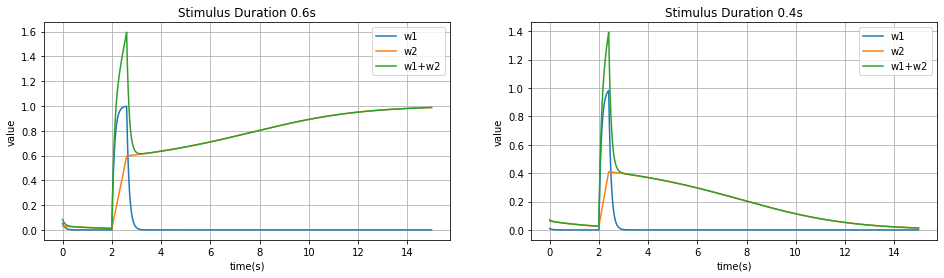

In [7]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16, 4)

plot_trajectory(axs[0], t, sol1, title='Stimulus Duration {}s'.format(DEL_STIM_1))
plot_trajectory(axs[1], t, sol2, title='Stimulus Duration {}s'.format(DEL_STIM_2))

In [8]:
DEL_STIM_1 = 0.4

STIM_START = 2
STIM_STOP = STIM_START + DEL_STIM_1

In [9]:
TAU_W1 = 0.5

t, sol1 = integrate(stim_start=STIM_START, stim_stop=STIM_STOP, tau_w=TAU_W1)

In [10]:
TAU_W2= 0.05

t, sol2 = integrate(stim_start=STIM_START, stim_stop=STIM_STOP, tau_w=TAU_W2)

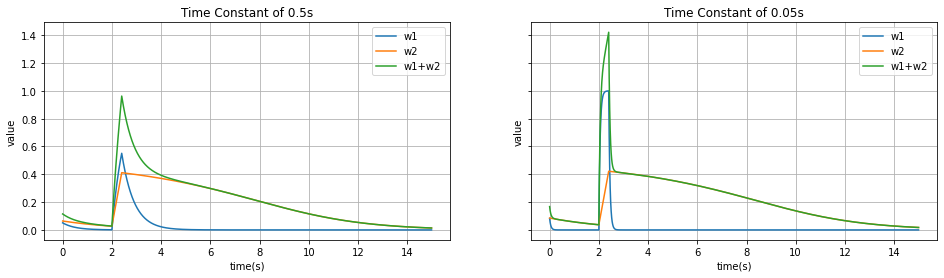

In [11]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(16, 4)

plot_trajectory(axs[0], t, sol1, title='Time Constant of {}s'.format(TAU_W1))
plot_trajectory(axs[1], t, sol2, title='Time Constant of {}s'.format(TAU_W2))